In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import spacy

In [2]:
df = pd.read_csv("diario_emociones.csv")

# Balancear clases por sobremuestreo
dfs = []
for emocion in df["emocion"].unique():
    subset = df[df["emocion"] == emocion]
    dfs.append(resample(subset, 
                      replace=True, 
                      n_samples=500,  # Ajustar seg√∫n necesidad
                      random_state=42))
df = pd.concat(dfs, ignore_index=True)

In [3]:
nlp = spacy.load("es_core_news_sm")

def limpiar_texto(texto):
    doc = nlp(texto.lower())
    tokens = [
        token.lemma_ 
        for token in doc 
        if not token.is_stop 
        and not token.is_punct
        and token.is_alpha
    ]
    return " ".join(tokens)

df["texto_limpio"] = df["texto"].apply(limpiar_texto)

In [4]:
vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),  # Bigramas
    min_df=5,            # Ignorar t√©rminos raros
    max_df=0.9          # Ignorar t√©rminos muy comunes
)
X = vectorizer.fit_transform(df["texto_limpio"]).toarray()

# Codificaci√≥n de emociones
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["emocion"])



In [5]:
model = Sequential()
model.add(Dense(
    256, 
    input_shape=(X.shape[1],),
    activation='relu',
    kernel_regularizer=l2(0.02),
    activity_regularizer=l2(0.01)
))
model.add(Dropout(0.7))
model.add(Dense(
    128,
    activation='relu',
    kernel_regularizer=l2(0.01))
)
model.add(Dropout(0.6))
model.add(Dense(
    len(label_encoder.classes_), 
    activation='softmax'
))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\Users\walte\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 16ms/step - accuracy: 0.2576 - loss: 8.0193 - val_accuracy: 0.7820 - val_loss: 4.5361
Epoch 2/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.4535 - loss: 3.9032 - val_accuracy: 0.6800 - val_loss: 2.5523
Epoch 3/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.4601 - loss: 2.3300 - val_accuracy: 0.9760 - val_loss: 1.8605
Epoch 4/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.6914 - loss: 1.7798 - val_accuracy: 1.0000 - val_loss: 1.5483
Epoch 5/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.8417 - loss: 1.4897 - val_accuracy: 1.0000 - val_loss: 1.2011
Epoch 6/100
32/32 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.9451 - loss: 1.1913 - val_accuracy: 1.0000 - val_loss: 0.88

In [7]:
def predecir_emocion(texto, umbral_confianza=0.65):
    texto_limpio = limpiar_texto(texto)
    texto_vector = vectorizer.transform([texto_limpio]).toarray()
    prediccion = model.predict(texto_vector, verbose=0)
    
    if np.max(prediccion) < umbral_confianza:
        return "indefinido", np.max(prediccion)
    
    return label_encoder.inverse_transform([np.argmax(prediccion)])[0], np.max(prediccion)

In [8]:
def chatbot_respuesta(texto):
    emocion, confianza = predecir_emocion(texto)
    
    recursos = {
        "tristeza": {
            "mensaje": "üîµ Pareces sentir tristeza. Te recomiendo:",
            "acciones": [
                "Meditaci√≥n guiada 'Alivio emocional' (10 min)",
                "Ejercicio: Escribe una carta para liberar emociones"
            ]
        },
        "ansiedad": {
            "mensaje": "üü† Detecto se√±ales de ansiedad. Prueba:",
            "acciones": [
                "T√©cnica de respiraci√≥n 4-7-8 (instrucciones)",
                "Ejercicio de grounding: 5-4-3-2-1"
            ]
        },
        "estr√©s": {
            "mensaje": "üü¢ Sugerencias para manejar el estr√©s:",
            "acciones": [
                "Meditaci√≥n 'Libera tensiones' (15 min)",
                "Prioriza tareas con matriz Eisenhower"
            ]
        },
        "enojo": {
            "mensaje": "üî¥ Detecto frustraci√≥n. Intenta:",
            "acciones": [
                "Ejercicio f√≠sico de alta intensidad",
                "T√©cnica de pausa consciente de 5 minutos"
            ]
        },
        "felicidad": {
            "mensaje": "üü° ¬°Me alegra verte as√≠! Mant√©n esto:",
            "acciones": [
                "Registra este momento en tu diario positivo",
                "Comparte tu estado con alguien especial"
            ]
        },
        "indefinido": {
            "mensaje": "‚ö™Ô∏è Necesito entenderte mejor. ¬øPodr√≠as:",
            "acciones": [
                "Describir c√≥mo te sientes con m√°s detalle?",
                "Contarme qu√© ha pasado recientemente?"
            ]
        }
    }
    
    respuesta = recursos.get(emocion, recursos["indefinido"])
    return (
        f"{respuesta['mensaje']}\n" + 
        "\n".join([f"- {accion}" for accion in respuesta['acciones']]) + 
        f"\n\nConfianza del modelo: {confianza:.2%}"
    )


In [9]:
test_cases = [
    "No tengo ganas de salir de la cama hoy",
    "Estoy harto de las reuniones in√∫tiles",
    "Me palpita el coraz√≥n muy r√°pido",
    "Logr√© terminar todos mis pendientes a tiempo!",
    "El tr√°fico me hizo llegar tarde otra vez"
]

for caso in test_cases:
    print(f"üßë Usuario: {caso}")
    print(f"ü§ñ Chatbot:\n{chatbot_respuesta(caso)}\n")
    print("‚Äï" * 50)

üßë Usuario: No tengo ganas de salir de la cama hoy
ü§ñ Chatbot:
üü† Detecto se√±ales de ansiedad. Prueba:
- T√©cnica de respiraci√≥n 4-7-8 (instrucciones)
- Ejercicio de grounding: 5-4-3-2-1

Confianza del modelo: 70.07%

‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï
üßë Usuario: Estoy harto de las reuniones in√∫tiles
ü§ñ Chatbot:
üî¥ Detecto frustraci√≥n. Intenta:
- Ejercicio f√≠sico de alta intensidad
- T√©cnica de pausa consciente de 5 minutos

Confianza del modelo: 76.42%

‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï
üßë Usuario: Me palpita el coraz√≥n muy r√°pido
ü§ñ Chatbot:
‚ö™Ô∏è Necesito entenderte mejor. ¬øPodr√≠as:
- Describir c√≥mo te sientes con m√°s detalle?
- Contarme qu√© ha pasado recientemente?

Confianza del modelo: 34.15%

‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï‚Äï

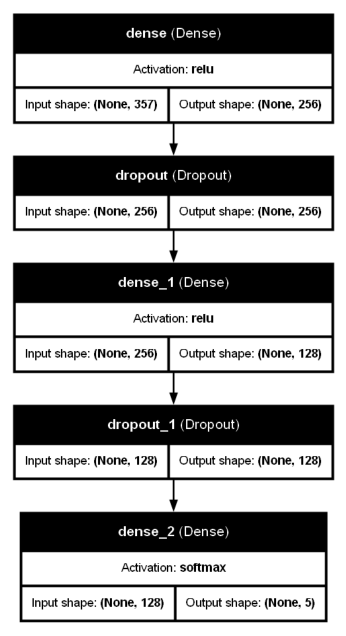

In [16]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'  # Ajusta la ruta si instalaste en otra ubicaci√≥n

plt.figure(figsize=(12, 8))
plot_model(
    model,
    to_file='model_plot.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=96
)
plt.imshow(plt.imread('model_plot.png'))
plt.axis('off')
plt.show()

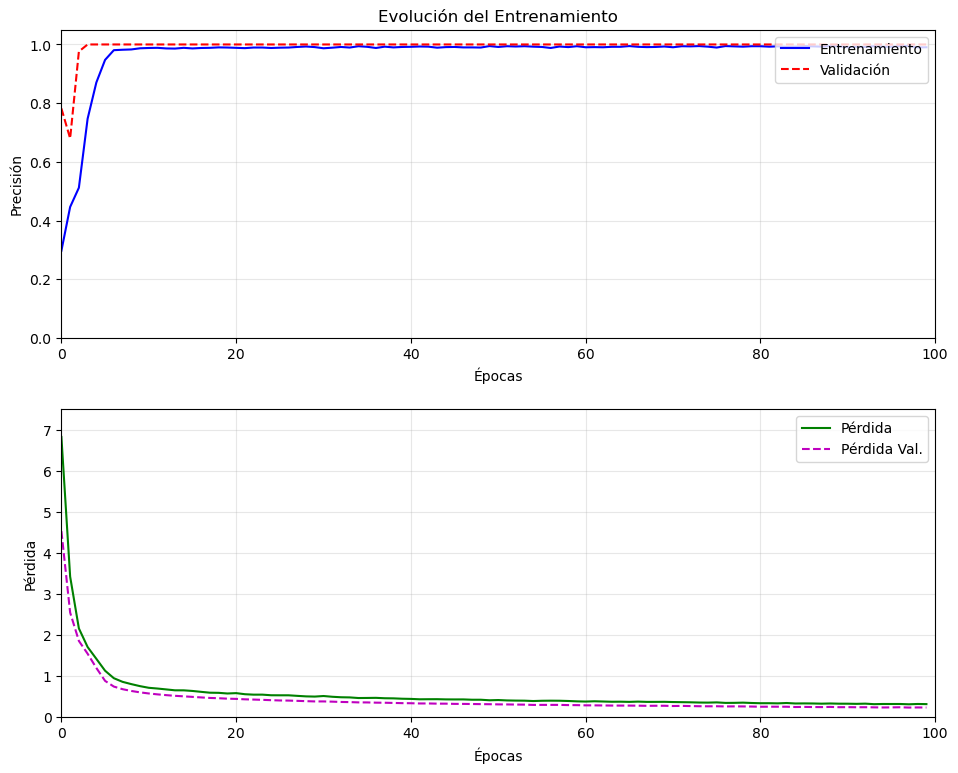

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

# Configurar figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plt.tight_layout(pad=3.0)

# Inicializar l√≠neas
line1, = ax1.plot([], [], 'b-', label='Entrenamiento')
line2, = ax1.plot([], [], 'r--', label='Validaci√≥n')
line3, = ax2.plot([], [], 'g-', label='P√©rdida')
line4, = ax2.plot([], [], 'm--', label='P√©rdida Val.')

# Configuraciones de ejes
for ax in [ax1, ax2]:
    ax.set_xlabel('√âpocas', fontsize=10)
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)
    
ax1.set_ylabel('Precisi√≥n', fontsize=10)
ax2.set_ylabel('P√©rdida', fontsize=10)
ax1.set_title('Evoluci√≥n del Entrenamiento', fontsize=12)

# Datos iniciales
def init():
    for line in [line1, line2, line3, line4]:
        line.set_data([], [])
    return line1, line2, line3, line4

# Funci√≥n de actualizaci√≥n
def animate(i):
    x = np.arange(i+1)
    
    line1.set_data(x, history.history['accuracy'][:i+1])
    line2.set_data(x, history.history['val_accuracy'][:i+1])
    line3.set_data(x, history.history['loss'][:i+1])
    line4.set_data(x, history.history['val_loss'][:i+1])
    
    ax1.set_xlim(0, len(history.history['accuracy']))
    ax1.set_ylim(0, 1.05)
    ax2.set_xlim(0, len(history.history['accuracy']))
    ax2.set_ylim(0, max(history.history['loss']) * 1.1)
    
    return line1, line2, line3, line4

# Crear animaci√≥n
anim = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(history.history['accuracy']),
    interval=400,
    blit=True
)

# Mostrar en Jupyter
HTML(anim.to_html5_video())

In [32]:
def visualize_activations(texto):
    texto_limpio = limpiar_texto(texto)
    texto_vector = vectorizer.transform([texto_limpio]).toarray()
    
    # Obtener predicci√≥n y confianza
    emocion, confianza = predecir_emocion(texto)
    
    # Crear modelo de activaciones
    if not model.built:
        model.build(input_shape=(None, X.shape[1]))
    
    layer_outputs = [layer.output for layer in model.layers if 'dropout' not in layer.name.lower()]
    activation_model = tf.keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)
    activations = activation_model.predict(texto_vector)
    
    # Configurar figura
    fig = plt.figure(figsize=(16, 8), dpi=100)
    gs = fig.add_gridspec(2, len(activations)+1, height_ratios=[3, 1])
    
    # 1. Visualizaci√≥n de Activaciones
    for i, (activation, layer) in enumerate(zip(activations, model.layers)):
        if 'dropout' in layer.name.lower():
            continue
            
        ax = fig.add_subplot(gs[0, i])
        ax.set_title(f'{layer.name.upper()}\n({activation.shape[1]} neuronas)', fontsize=10, pad=15)
        
        # Normalizar activaciones para mejor visualizaci√≥n
        norm_activation = (activation - activation.min()) / (activation.max() - activation.min())
        im = ax.imshow(norm_activation[0:1, :], cmap='plasma', aspect='auto', vmin=0, vmax=1)
        
        plt.colorbar(im, ax=ax, shrink=0.8, label='Activaci√≥n normalizada')
        ax.set_xlabel('Neuronas')
        ax.set_yticks([])
        
        # Destacar neuronas m√°s activas
        max_neuron = np.argmax(activation)
        ax.annotate('‚òÖ', xy=(max_neuron, 0.5), color='gold', fontsize=14, ha='center')

    # 2. Visualizaci√≥n del Texto de Entrada
    ax_text = fig.add_subplot(gs[0, -1])
    ax_text.set_title('REPRESENTACI√ìN DEL TEXTO', fontsize=10)
    ax_text.imshow(texto_vector, cmap='Blues', aspect='auto')
    ax_text.set_ylabel('TF-IDF Features')
    ax_text.set_xlabel('Dimensi√≥n')
    ax_text.set_xticks([])
    ax_text.set_yticks([])
    
    # 3. Explicaci√≥n de la Arquitectura
    ax_info = fig.add_subplot(gs[1, :])
    ax_info.axis('off')
    info_text = (
        f"Predicci√≥n: {emocion.upper()} (Confianza: {confianza:.1%})\n"
        "Leyenda:\n"
        "‚Ä¢ Cada columna representa una capa de la red\n"
        "‚òÖ Neurona con mayor activaci√≥n en cada capa\n"
        "Color: Intensidad de activaci√≥n (0: m√≠nima, 1: m√°xima)\n"
        "TF-IDF: Representaci√≥n num√©rica del texto de entrada"
    )
    ax_info.text(0.05, 0.5, info_text, ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle(f'AN√ÅLISIS DE ACTIVACIONES NEURONALES - "{texto[:30]}..."', fontsize=12, y=0.98)
    plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 145ms/step


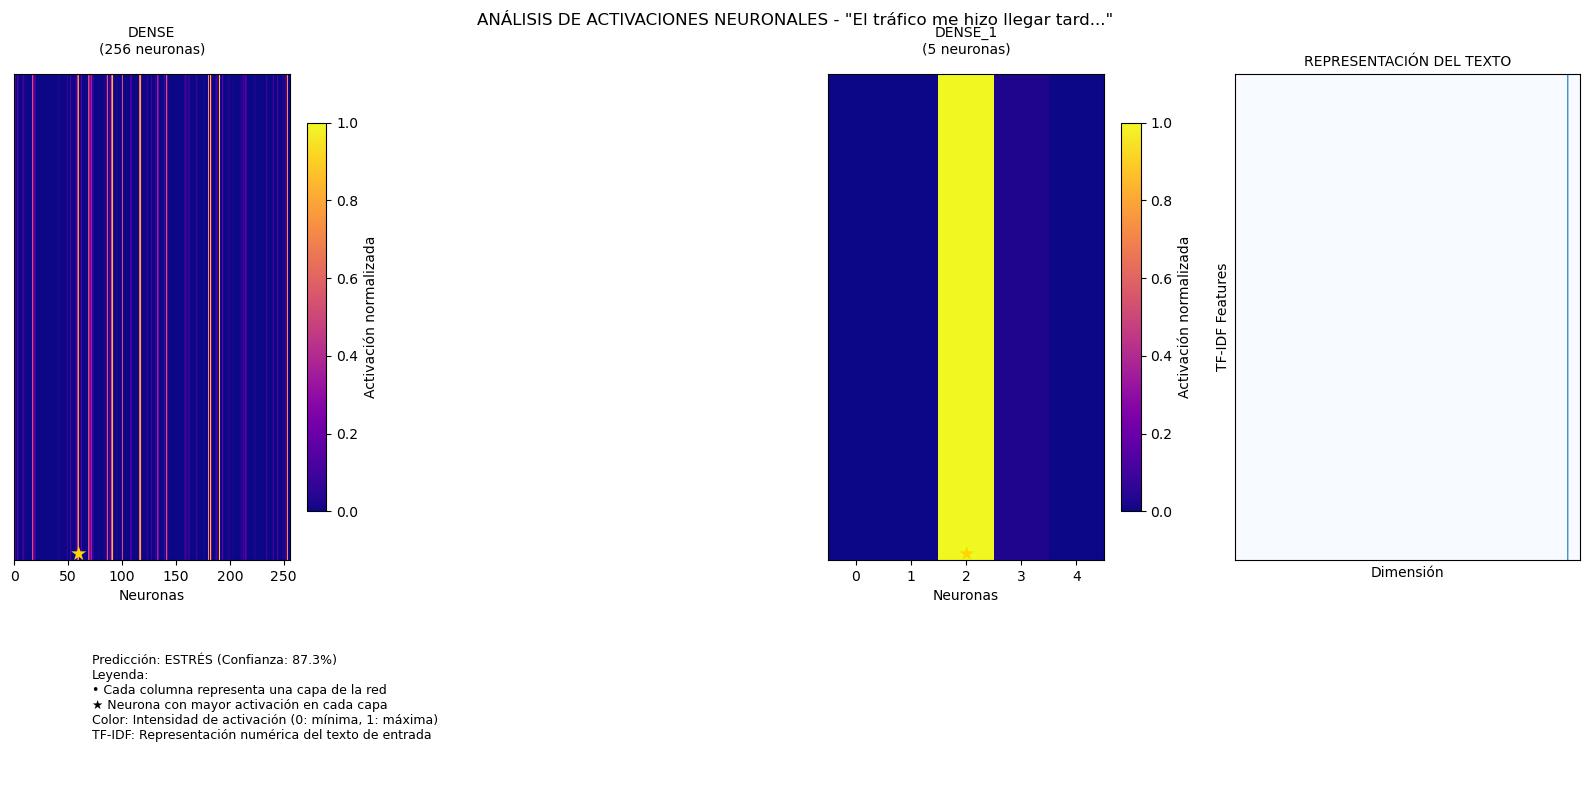

In [34]:

# Ejemplo de uso
visualize_activations("El tr√°fico me hizo llegar tarde otra vez")